In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [98]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [99]:
# Since the PaymentsHistory column is a column of lists, we will sum all the values in the list and create a new column
# called TotalPaymentsHistory
train['TotalPaymentsHistory'] = train['PaymentsHistory'].apply(lambda x: sum(eval(x)))
train.drop('PaymentsHistory', axis=1, inplace=True)

# For the TransactionDates column, we will extract the first and last date and create two new columns
# called FirstTransactionDate and LastTransactionDate
train['FirstTransactionDate'] = train['TransactionDates'].apply(lambda x: eval(x)[0])
train['LastTransactionDate'] = train['TransactionDates'].apply(lambda x: eval(x)[-1])

train.drop('TransactionDates', axis=1, inplace=True)

# create a target variable
train['Target'] = train[['m1','m2','m3', 'm4', 'm5', 'm6']].sum(axis=1)
train.drop(['m1','m2','m3', 'm4', 'm5', 'm6'], axis=1, inplace=True)


In [100]:
# Convert transaction dates to datetime
train['FirstTransactionDate'] = pd.to_datetime(train['FirstTransactionDate'], format='%m-%Y', errors='coerce')
train['LastTransactionDate'] = pd.to_datetime(train['LastTransactionDate'], format='%m-%Y', errors='coerce')

# extract the year, month and day from the first transaction date
train['FirstTransactionYear'] = train['FirstTransactionDate'].dt.year
train['FirstTransactionMonth'] = train['FirstTransactionDate'].dt.month

# extract the year, month and day from the last transaction date
train['LastTransactionYear'] = train['LastTransactionDate'].dt.year
train['LastTransactionMonth'] = train['LastTransactionDate'].dt.month

In [102]:
metadata = pd.read_csv('metadata.csv')
metadata.head()

,ID,RegistrationDate,Deposit,UpsellDate,AccessoryRate,PaymentMethod,rateTypeEntity,RatePerUnit,DaysOnDeposit,MainApplicantGender,Age,Region,Town,Occupation,SupplierName,Term,TotalContractValue,ExpectedTermDate,FirstPaymentDate,LastPaymentDate
0,ID_K00S4N4,2015-12-10 00:00:00,2000,NaN,0.0,FINANCED,DAILY,35,7,Male,41.0,Mount Kenya Region,Embu,Other,d_light,364,14740.0,2016-12-08 00:00:00,2015-12-10 09:52:35,2016-10-23 04:52:30
1,ID_6L67PAA,2015-12-09 00:00:00,2000,NaN,0.0,FINANCED,DAILY,35,7,Male,33.0,Coast Region,Kilifi,Other,d_light,364,14740.0,2016-12-07 00:00:00,2015-12-09 13:14:03,2020-05-24 15:32:18
2,ID_102CV85,2015-12-18 00:00:00,2000,2018-03-29 10:14:58,35.0,FINANCED,DAILY,35,7,Female,48.0,Nairobi Region,Makueni,Business,d_light,392,29480.0,2017-01-13 00:00:00,2015-12-18 06:22:34,2017-02-01 15:23:44
3,ID_HXBJFHB,2015-11-25 00:00:00,2000,NaN,0.0,FINANCED,DAILY,35,7,Female,43.0,NaN,UNKNOWN,Teacher,d_light,364,14740.0,2016-11-23 00:00:00,2015-11-25 13:25:57,2017-05-22 16:46:54
4,ID_3K9VZ5J,2015-12-02 00:00:00,2000,NaN,0.0,FINANCED,DAILY,35,7,Female,56.0,Mount Kenya Region,Kirinyaga,Other,d_light,364,14740.0,2016-11-30 00:00:00,2015-12-05 10:34:32,2017-05-12 16:50:52


In [103]:
metadata.isna().sum()

ID                         0
RegistrationDate           0
Deposit                    0
UpsellDate             36370
AccessoryRate              0
PaymentMethod              0
rateTypeEntity             0
RatePerUnit                0
DaysOnDeposit              0
MainApplicantGender        0
Age                     6939
Region                  1934
Town                       0
Occupation                 0
SupplierName               0
Term                       0
TotalContractValue         0
ExpectedTermDate           0
FirstPaymentDate           0
LastPaymentDate            0
dtype: int64

In [104]:
# Drop the columns with more than 50% missing values
def drop_missing_values(df, threshold=0.5):
    return df.dropna(thresh=threshold*len(df), axis=1)

metadata = drop_missing_values(metadata, threshold=0.5)

# Impute the missing values with the mode
def impute_missing_values(df):
    for col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)
    return df

metadata = impute_missing_values(metadata)

metadata.isna().sum()

ID                     0
RegistrationDate       0
Deposit                0
AccessoryRate          0
PaymentMethod          0
rateTypeEntity         0
RatePerUnit            0
DaysOnDeposit          0
MainApplicantGender    0
Age                    0
Region                 0
Town                   0
Occupation             0
SupplierName           0
Term                   0
TotalContractValue     0
ExpectedTermDate       0
FirstPaymentDate       0
LastPaymentDate        0
dtype: int64

In [105]:
# Merge the metadata with the train dataset
train = pd.merge(train, metadata, on='ID', how='left')
train.isna().sum()

ID                       0
TotalPaymentsHistory     0
FirstTransactionDate     0
LastTransactionDate      0
Target                   0
FirstTransactionYear     0
FirstTransactionMonth    0
LastTransactionYear      0
LastTransactionMonth     0
RegistrationDate         0
Deposit                  0
AccessoryRate            0
PaymentMethod            0
rateTypeEntity           0
RatePerUnit              0
DaysOnDeposit            0
MainApplicantGender      0
Age                      0
Region                   0
Town                     0
Occupation               0
SupplierName             0
Term                     0
TotalContractValue       0
ExpectedTermDate         0
FirstPaymentDate         0
LastPaymentDate          0
dtype: int64

In [108]:
# Merge metadata with the test dataset
test = pd.merge(test, metadata, on='ID', how='left')
test.isna().sum()

ID                     0
TransactionDates       0
PaymentsHistory        0
RegistrationDate       0
Deposit                0
AccessoryRate          0
PaymentMethod          0
rateTypeEntity         0
RatePerUnit            0
DaysOnDeposit          0
MainApplicantGender    0
Age                    0
Region                 0
Town                   0
Occupation             0
SupplierName           0
Term                   0
TotalContractValue     0
ExpectedTermDate       0
FirstPaymentDate       0
LastPaymentDate        0
dtype: int64

In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28007 entries, 0 to 28006
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     28007 non-null  object        
 1   TotalPaymentsHistory   28007 non-null  float64       
 2   FirstTransactionDate   28007 non-null  datetime64[ns]
 3   LastTransactionDate    28007 non-null  datetime64[ns]
 4   Target                 28007 non-null  float64       
 5   FirstTransactionYear   28007 non-null  int32         
 6   FirstTransactionMonth  28007 non-null  int32         
 7   LastTransactionYear    28007 non-null  int32         
 8   LastTransactionMonth   28007 non-null  int32         
 9   RegistrationDate       28007 non-null  object        
 10  Deposit                28007 non-null  int64         
 11  AccessoryRate          28007 non-null  float64       
 12  PaymentMethod          28007 non-null  object        
 13  r

In [112]:
# Convert the categorical columns to numerical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in train.columns:
    if train[col].dtype == 'object':
        train[col] = le.fit_transform(train[col])

<Axes: >

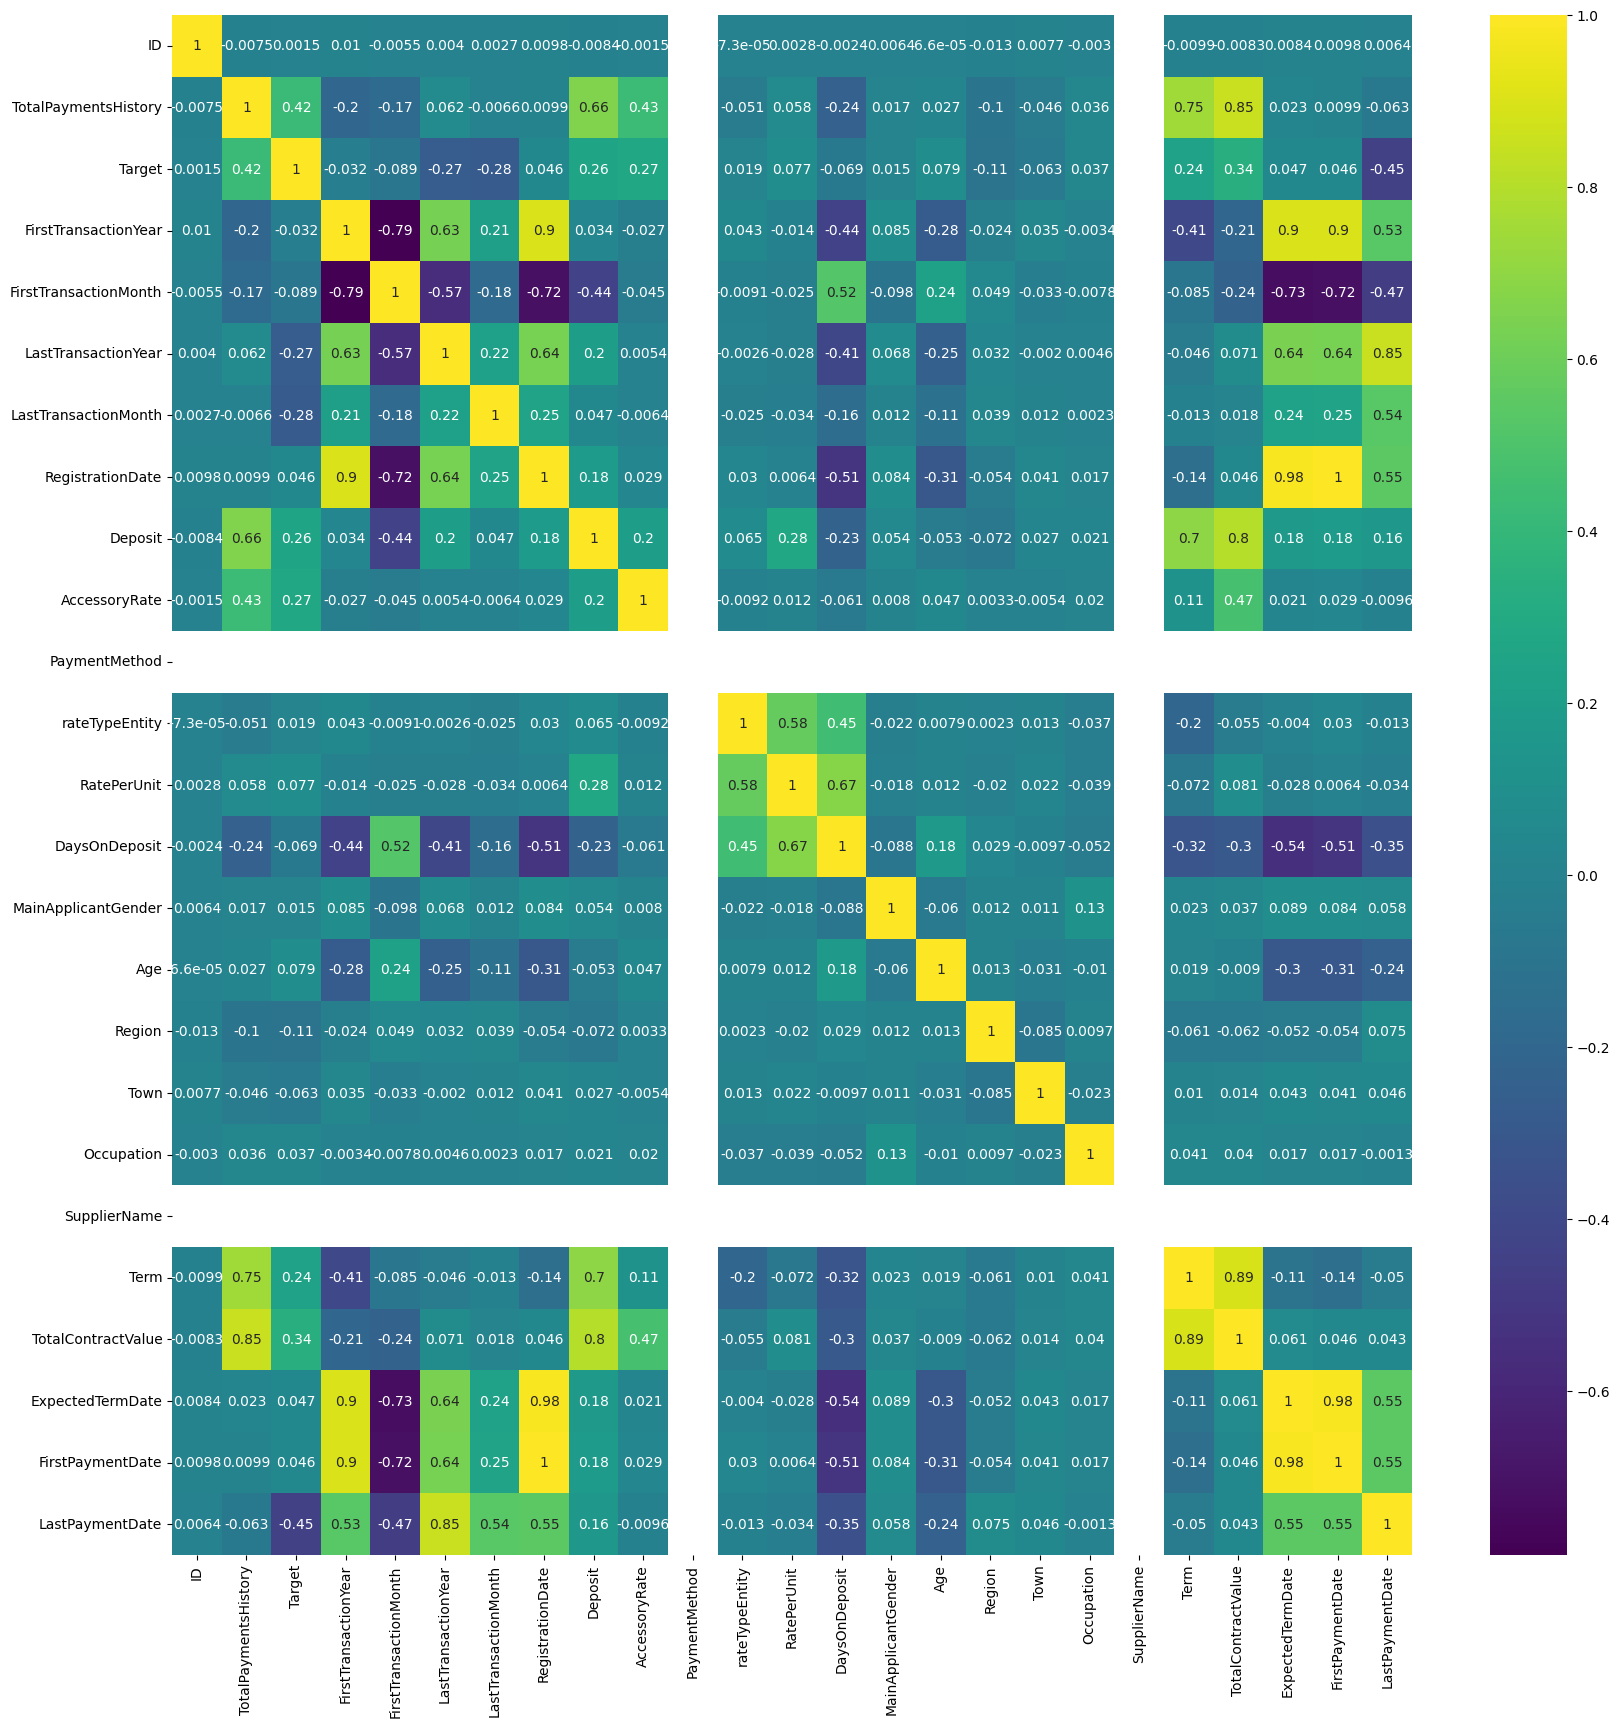

In [113]:
# Correlation matrix
corr = train.select_dtypes('number').corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='viridis')

In [124]:
# Correlation with the target variable
corr['Target'].sort_values(ascending=False)

Target                   1.000000
TotalPaymentsHistory     0.422947
TotalContractValue       0.341511
AccessoryRate            0.273263
Deposit                  0.257522
Term                     0.239421
Age                      0.079107
RatePerUnit              0.076822
ExpectedTermDate         0.046950
FirstPaymentDate         0.045586
RegistrationDate         0.045568
Occupation               0.036806
rateTypeEntity           0.018743
MainApplicantGender      0.014954
ID                       0.001534
FirstTransactionYear    -0.031861
Town                    -0.062868
DaysOnDeposit           -0.068915
FirstTransactionMonth   -0.088859
Region                  -0.112222
LastTransactionYear     -0.270576
LastTransactionMonth    -0.280468
LastPaymentDate         -0.447960
PaymentMethod                 NaN
SupplierName                  NaN
Name: Target, dtype: float64

<Axes: xlabel='Target', ylabel='Density'>

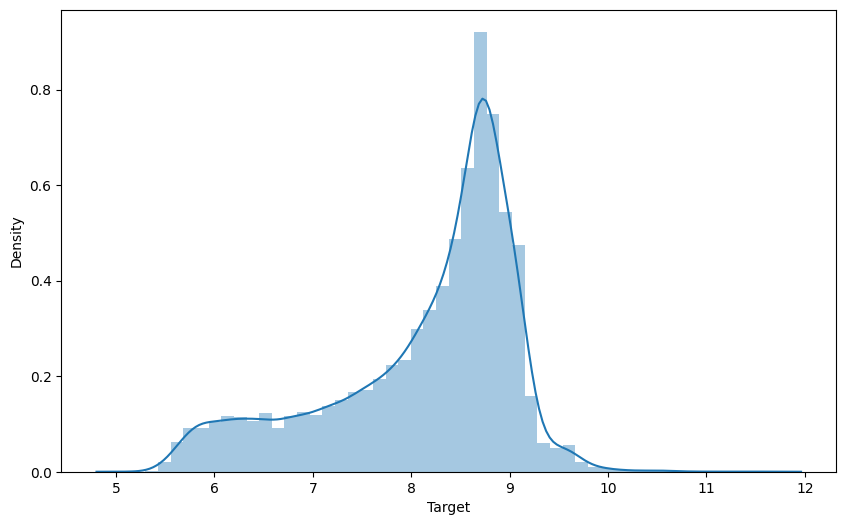

In [117]:
# plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.distplot(train['Target'], bins=50)

In [116]:
# sINCE THE TARGET VARIABLE IS SKEWED, WE WILL USE THE LOG TRANSFORMATION TO MAKE IT NORMAL
train['Target'] = np.log1p(train['Target'])

In [125]:
# Select features with high corr over 0.1
corr_features = corr.index[abs(corr['Target']) > 0.1]
corr_features

Index(['TotalPaymentsHistory', 'Target', 'LastTransactionYear',
       'LastTransactionMonth', 'Deposit', 'AccessoryRate', 'Region', 'Term',
       'TotalContractValue', 'LastPaymentDate'],
      dtype='object')

In [136]:
# Model building
X = train[corr_features]
y = train['Target']

# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

# Import the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
lr = LinearRegression()
rf = RandomForestRegressor()

# Fit the models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Make predictions
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)

# Evaluate the models
print('Linear Regression')
print('RMSE: ', np.sqrt(mean_squared_error(y_test, lr_pred)))
print('RMSLE: ', np.sqrt(mean_squared_log_error(y_test, lr_pred)))
print('R2: ', r2_score(y_test, lr_pred))

print('\nRandom Forest')
print('RMSE: ', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('RMSLE: ', np.sqrt(mean_squared_log_error(y_test, rf_pred)))
print('R2: ', r2_score(y_test, rf_pred))

Linear Regression
RMSE:  6.470809718163945e-13
RMSLE:  7.198628266896043e-14
R2:  1.0

Random Forest
RMSE:  0.003842092213761584
RMSLE:  0.0003148749866164664
R2:  0.9999839350616095


Text(0.5, 1.0, 'Random Forest')

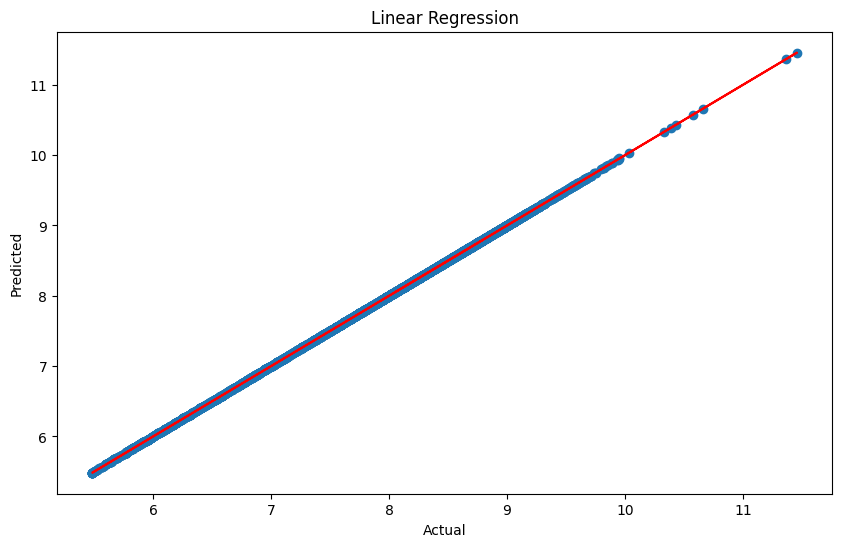

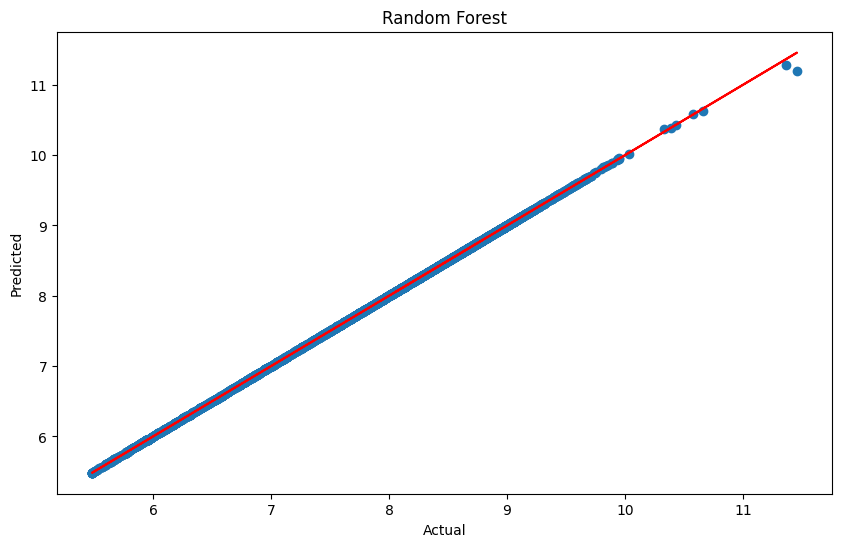

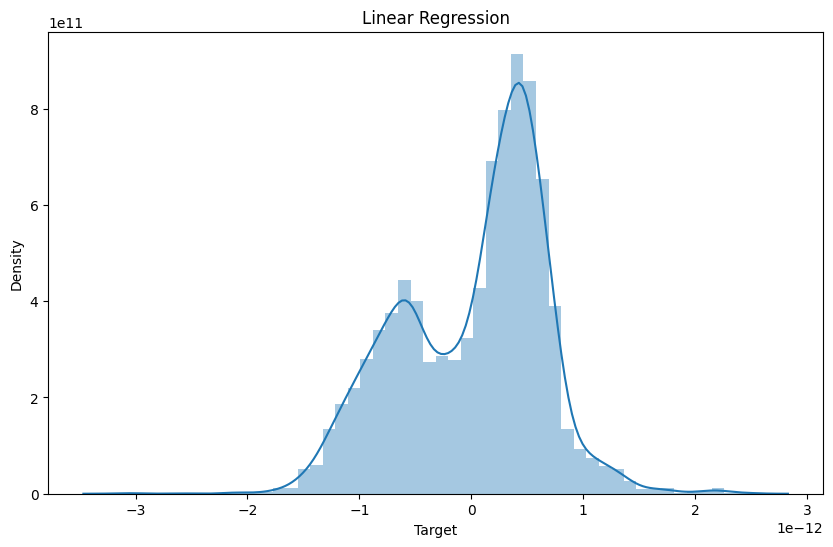

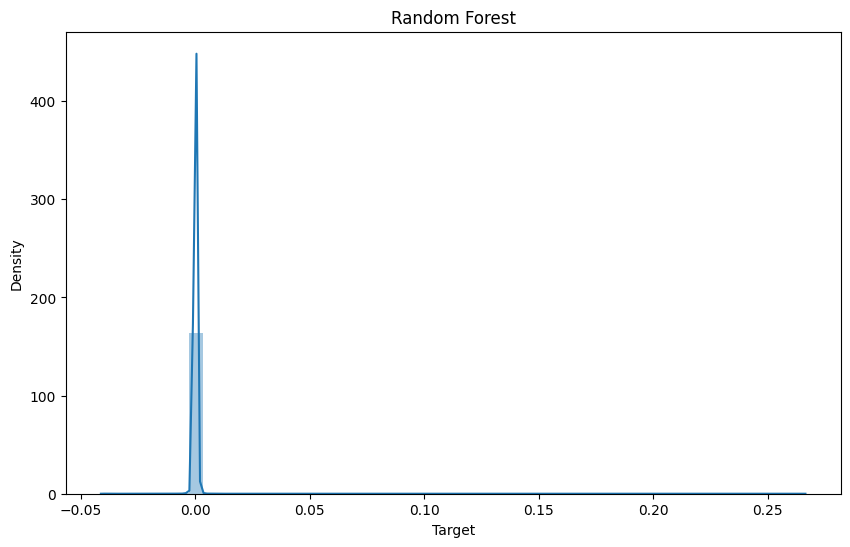

In [137]:
# Visualize the predictions and residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')

# Residuals refers to the difference between the actual and predicted values
# Residuals should be normally distributed

# Plot the residuals
plt.figure(figsize=(10, 6))
sns.distplot(y_test - lr_pred, bins=50)
plt.title('Linear Regression')

plt.figure(figsize=(10, 6))
sns.distplot(y_test - rf_pred, bins=50)
plt.title('Random Forest')

Decision Tree
RMSE:  0.002642605947435024
RMSLE:  0.00021993284891991754
R2:  0.9999924000923978


Text(0.5, 1.0, 'Decision Tree')

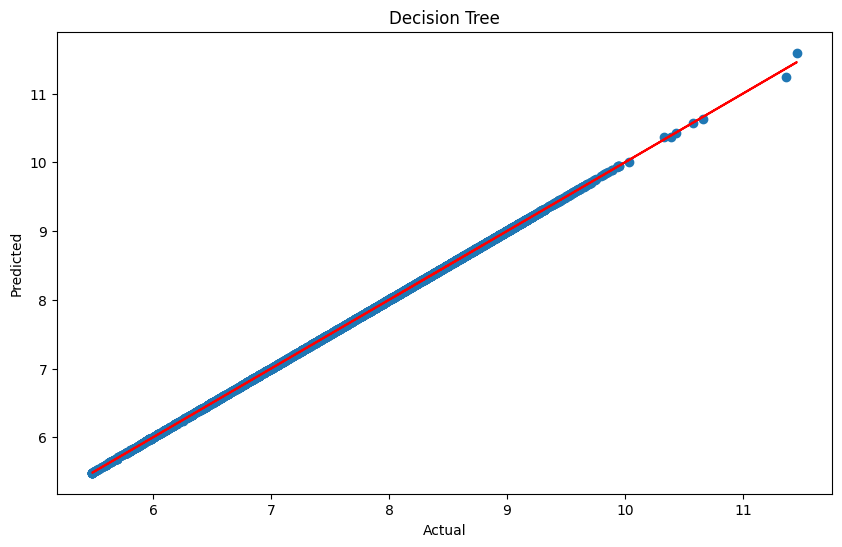

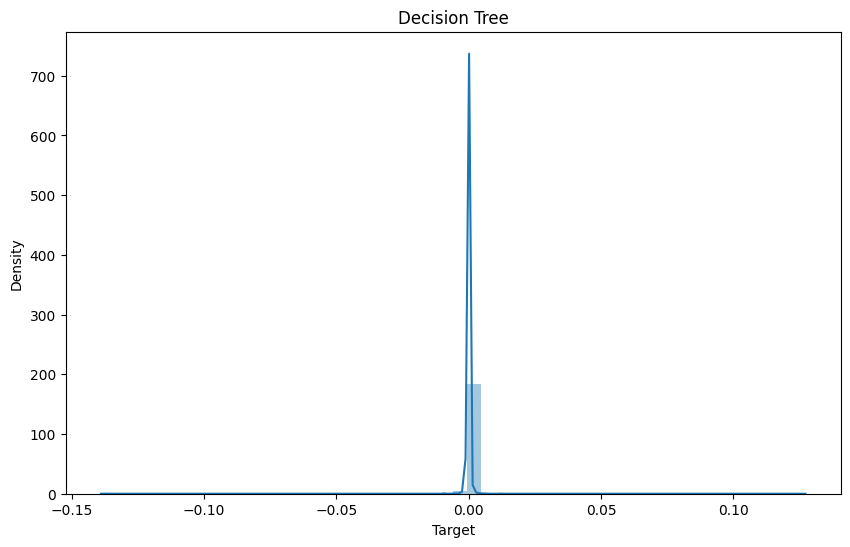

In [150]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

# Fit the model
dt.fit(X_train, y_train)

# Make predictions
dt_pred = dt.predict(X_test)

# Evaluate the model
print('Decision Tree')
print('RMSE: ', np.sqrt(mean_squared_error(y_test, dt_pred)))
print('RMSLE: ', np.sqrt(mean_squared_log_error(y_test, dt_pred)))
print('R2: ', r2_score(y_test, dt_pred))

# Visualize the predictions and residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_pred)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree')

# Plot the residuals
plt.figure(figsize=(10, 6))
sns.distplot(y_test - dt_pred, bins=50)
plt.title('Decision Tree')


XGBoost
RMSE:  0.0024627733348837394
RMSLE:  0.0002705373163874374
R2:  0.9999933992637218


Text(0.5, 1.0, 'XGBoost')

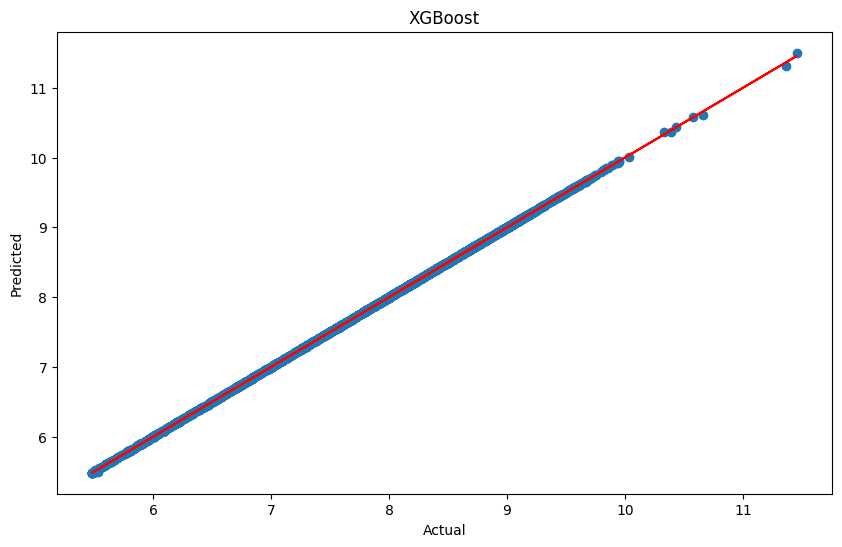

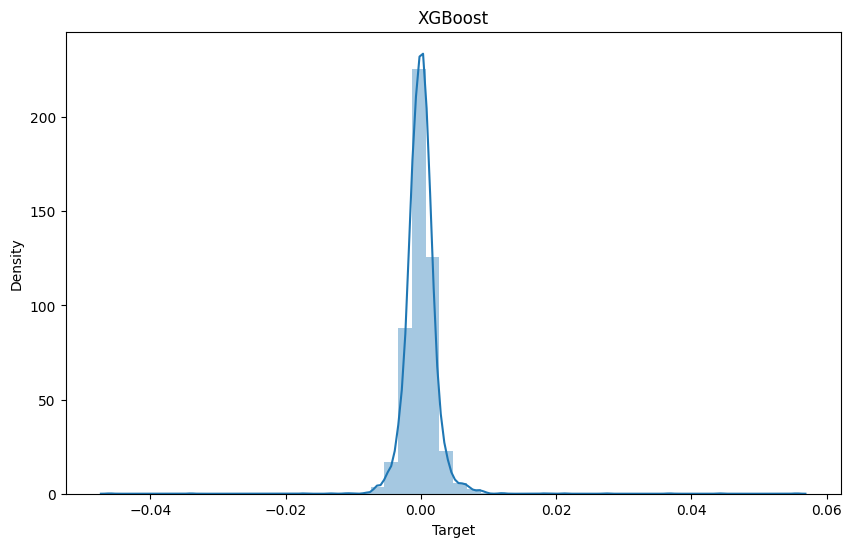

In [138]:
# XGBoost
from xgboost import XGBRegressor
xgb = XGBRegressor()

# Fit the model
xgb.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb.predict(X_test)

# Evaluate the model
print('XGBoost')
print('RMSE: ', np.sqrt(mean_squared_error(y_test, xgb_pred)))
print('RMSLE: ', np.sqrt(mean_squared_log_error(y_test, xgb_pred)))
print('R2: ', r2_score(y_test, xgb_pred))

# Visualize the predictions and residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_pred)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost')

# Plot the residuals
plt.figure(figsize=(10, 6))
sns.distplot(y_test - xgb_pred, bins=50)
plt.title('XGBoost')

In [129]:
# Make predictions on the test set
test['TotalPaymentsHistory'] = test['PaymentsHistory'].apply(lambda x: sum(eval(x)))
test.drop('PaymentsHistory', axis=1, inplace=True)

test['FirstTransactionDate'] = test['TransactionDates'].apply(lambda x: eval(x)[0])
test['LastTransactionDate'] = test['TransactionDates'].apply(lambda x: eval(x)[-1])

test.drop('TransactionDates', axis=1, inplace=True)

test['FirstTransactionDate'] = pd.to_datetime(test['FirstTransactionDate'], format='%m-%Y', errors='coerce')

test['LastTransactionDate'] = pd.to_datetime(test['LastTransactionDate'], format='%m-%Y', errors='coerce')

test['FirstTransactionYear'] = test['FirstTransactionDate'].dt.year
test['FirstTransactionMonth'] = test['FirstTransactionDate'].dt.month

test['LastTransactionYear'] = test['LastTransactionDate'].dt.year
test['LastTransactionMonth'] = test['LastTransactionDate'].dt.month

test.drop(['FirstTransactionDate', 'LastTransactionDate'], axis=1, inplace=True)

In [142]:
test.shape, train.shape

((9336, 25), (28007, 42))

In [143]:
56016 - 9336

46680

In [144]:
import random
random.seed(42)
test = pd.concat([test, pd.DataFrame(np.random.randn(46680, 25), columns=test.columns)], ignore_index=True)

In [145]:
preds = xgb.predict(test[corr_features])


In [146]:
sample = pd.read_csv('SampleSubmission.csv')
sample['Target'] = preds

In [148]:
# Convert target column to 1dp
sample['Target'] = sample['Target'].apply(lambda x: round(x, 1))
sample.head()

,ID,Target
0,ID_6L67PAA x m1,11.6
1,ID_6L67PAA x m2,11.6
2,ID_6L67PAA x m3,11.6
3,ID_6L67PAA x m4,11.6
4,ID_6L67PAA x m5,11.6


In [149]:
sample.to_csv('submission.csv', index=False)

In [153]:
testpreds = lr.predict(test[corr_features])

#sample = pd.read_csv('SampleSubmission.csv')
sample['Target'] = testpreds

# Convert target column to 1dp
sample['Target'] = sample['Target'].apply(lambda x: round(x, 1))

sample.to_csv('Submission.csv', index=False)

In [155]:
sub = pd.read_csv('Submission.csv')
sub.head()

,ID,Target
0,ID_6L67PAA x m1,25305.0
1,ID_6L67PAA x m2,24434.0
2,ID_6L67PAA x m3,799.0
3,ID_6L67PAA x m4,18655.0
4,ID_6L67PAA x m5,22605.0
